### Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=os.getcwd()

In [3]:
data=data+'/data'


In [4]:
os.walk(data)

<generator object _walk at 0x7fbfd703af80>

In [5]:
df=pd.DataFrame()
for path,dirs,files in os.walk(data):
    for file in files:
        datapath=path+'/'+file
        paths=datapath.split('/')
        date=paths[-3]
        name=paths[-2]
        tempdf=pd.read_csv(datapath)
        tempdf['date']=date
        tempdf['name']=name
        df=pd.concat((df,tempdf))
        

In [6]:
df



,Unnamed: 0,product_id,quantity,date,name
0,0,41,4,2020-12-05,Alexey_Petrov
1,1,45,2,2020-12-05,Alexey_Petrov
2,2,33,1,2020-12-05,Alexey_Petrov
0,0,55,3,2020-12-05,Petr_Smirnov
1,1,49,3,2020-12-05,Petr_Smirnov
...,...,...,...,...,...
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov


In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

,product_id,quantity,date,name
0,41,4,2020-12-05,Alexey_Petrov
1,45,2,2020-12-05,Alexey_Petrov
2,33,1,2020-12-05,Alexey_Petrov
3,55,3,2020-12-05,Petr_Smirnov
4,49,3,2020-12-05,Petr_Smirnov
...,...,...,...,...
156,57,1,2020-12-03,Alexey_Smirnov
157,14,2,2020-12-03,Alexey_Smirnov
158,52,1,2020-12-03,Alexey_Smirnov
159,1,4,2020-12-03,Alexey_Smirnov


### Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [10]:
df.groupby('name', as_index=False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity',ascending=False).head(2).name.to_list()




['Alexey_Smirnov', 'Petr_Smirnov']

### Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?


In [11]:
topP=df.groupby('product_id', as_index=False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity',ascending=False).head(10)

<AxesSubplot: xlabel='product_id', ylabel='quantity'>

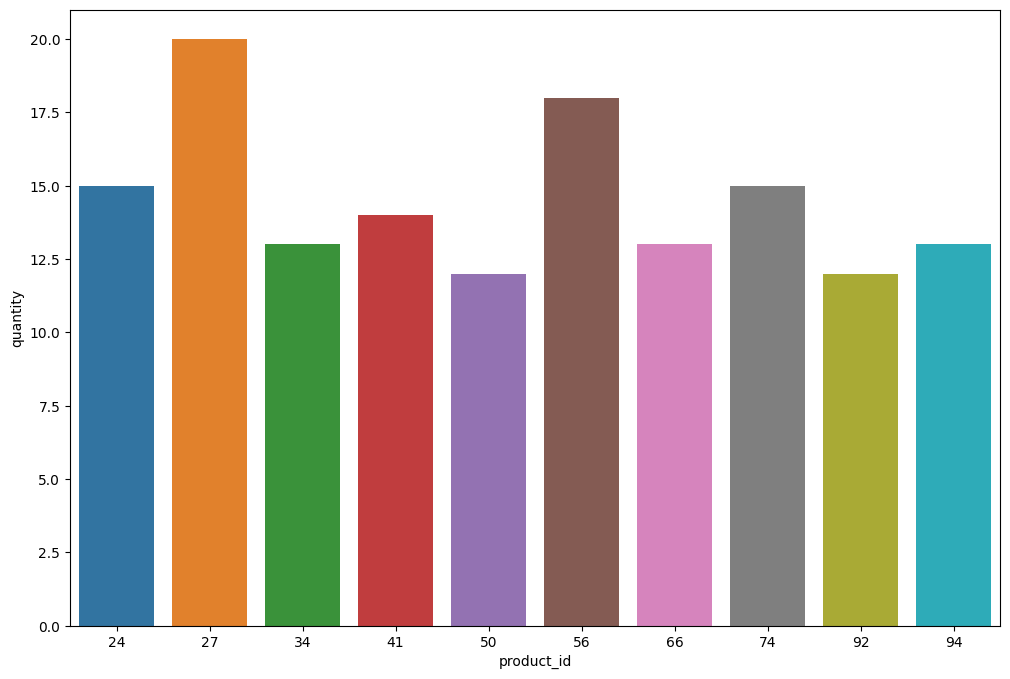

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(topP,x='product_id',y='quantity')

In [13]:
df.query('product_id==56').quantity.sum()

18

<AxesSubplot: xlabel='date', ylabel='count'>

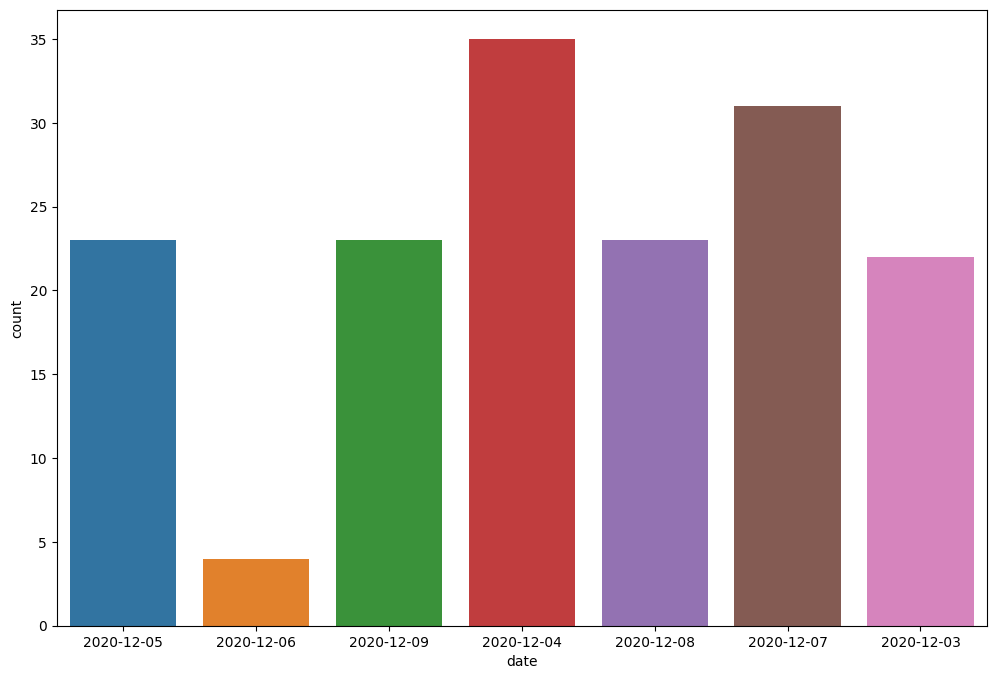

In [28]:
plt.figure(figsize=(12,8))

sns.countplot(df,x='date')

### Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [27]:
df.groupby(['name','product_id'])\
    .agg({'date':pd.Series.nunique}).query('date>1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
